In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
def f(x):
    return np.power(x[0]-4,2) + np.power(x[1]-4,2)

def h(x):
    return x[0] + x[1] - 5
    

In [3]:
def penalizacionCorchete(f, h, x ,u = 0.5, b= 2, e = 0.01):
    x_it = [x]
    while True: 
        def F(x):
            return f(x) + u * np.power(h(x),2)
            
        xk = minimize(F, x).x
        #print(xk)

        if u * np.power(h(xk),2) < e:
            return xk, x_it
        else:
            x_it.append(xk)
            u = b * u
            x = xk

In [4]:
x0, x_it = penalizacionCorchete(f,h, [1.5,2])

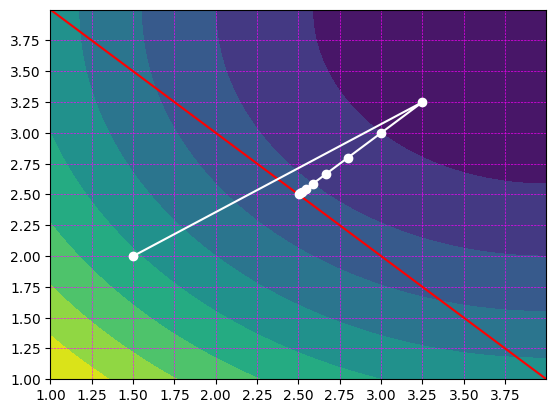

In [5]:
# Define range for input
r_min, r_max = 1, 4

xaxis = np.linspace(r_min, r_max, 200)
yaxis = np.linspace(r_min, r_max, 200)

x, y = np.meshgrid(xaxis, yaxis)

z = f([x,y])

x_it = np.array(x_it)

plt.contourf(x, y, z, levels=10, cmap='viridis')
plt.plot()

X = np.linspace(r_min, r_max, 200)
Y = 5 -X
plt.plot(X, Y, color="r")
plt.plot(x_it[:, 0], x_it[:, 1], 'o-', color='w')

plt.xlim(r_min, r_max)
plt.ylim(r_min, r_max)

plt.xticks(np.arange(min(xaxis), max(xaxis), 0.25))
plt.yticks(np.arange(min(yaxis), max(yaxis), 0.25))

plt.grid(True, linewidth=0.45, linestyle='--', color='magenta') 

plt.show()